In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5

C:\Users\J\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=27)

In [24]:
xgb_1 = XGBClassifier(
learning_rate =0.1,
n_estimators=1000,
max_depth=5,
min_child_weight=1,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
reg_alpha = 1,
seed=27)

In [25]:
xgb_1.fit(X_train, y_train, eval_metric='auc')

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn import metrics
print(metrics.classification_report(y_test, xgb_1.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.77      0.81      0.79       105
        1.0       0.53      0.47      0.50        49

avg / total       0.69      0.70      0.70       154



## Tune max_depth and min_child_weight

In [29]:
param_test1 = {
 'max_depth': range(3,10,2),
 'min_child_weight': range(1,6,2)
}
gsearch_1 = GridSearchCV(estimator = xgb_1, param_grid = param_test1, scoring='roc_auc',n_jobs=4, iid=False, cv=5)
gsearch_1.fit(X_train, y_train, eval_metric='auc')

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test, gsearch_1.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.77      0.82      0.80       105
        1.0       0.56      0.49      0.52        49

avg / total       0.71      0.71      0.71       154



In [31]:
gsearch_1.cv_results_

{'mean_fit_time': array([ 0.25818157,  0.36945691,  0.35504212,  0.43856945,  0.44542317,
         0.49174652,  0.59163051,  0.55496597,  0.50821133,  0.60009499,
         0.56468964,  0.46755791]),
 'mean_score_time': array([ 0.00180125,  0.00202508,  0.00100064,  0.0018013 ,  0.00180116,
         0.00340247,  0.00512648,  0.0022018 ,  0.00180125,  0.004003  ,
         0.00340228,  0.00180144]),
 'mean_test_score': array([ 0.79919046,  0.79646078,  0.79943399,  0.80331308,  0.79653036,
         0.79941125,  0.80258383,  0.79707094,  0.80250488,  0.80548746,
         0.79751251,  0.8016552 ]),
 'mean_train_score': array([ 1.        ,  1.        ,  0.99935408,  1.        ,  1.        ,
         0.99972949,  1.        ,  1.        ,  0.99973315,  1.        ,
         1.        ,  0.99972953]),
 'param_max_depth': masked_array(data = [3 3 3 5 5 5 7 7 7 9 9 9],
              mask = [False False False False False False False False False False False False],
        fill_value = ?),
 'param_m

In [33]:
gsearch_1.best_params_

{'max_depth': 9, 'min_child_weight': 1}

### 第二次

In [40]:
param_test_2 = {
    'max_depth':[7,8,9,10,11],
    'min_child_weight':[0,1,2,3]
}

In [41]:
gsearch_2 = GridSearchCV(estimator =xgb_1, param_grid = param_test_2, scoring='roc_auc',n_jobs=4, iid=False, cv=5)
gsearch_2.fit(X_train, y_train, eval_metric='auc')

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': [7, 8, 9, 10, 11], 'min_child_weight': [0, 1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [42]:
from sklearn import metrics
print(metrics.classification_report(y_test, gsearch_2.predict(X_test)))
gsearch_2.best_params_

             precision    recall  f1-score   support

        0.0       0.77      0.82      0.80       105
        1.0       0.56      0.49      0.52        49

avg / total       0.71      0.71      0.71       154



{'max_depth': 8, 'min_child_weight': 0}

## Tune gamma

In [43]:
xgb_2 = XGBClassifier(
learning_rate =0.1,
n_estimators=1000,
max_depth=8,
min_child_weight=0,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
reg_alpha = 1,
seed=27)

In [47]:
param_test_3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch_3 = GridSearchCV(estimator =xgb_2, param_grid = param_test_3, scoring='roc_auc',n_jobs=4, iid=False, cv=5)
gsearch_3.fit(X_train, y_train, eval_metric='auc')

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=0, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [48]:
from sklearn import metrics
print(metrics.classification_report(y_test, gsearch_3.predict(X_test)))
gsearch_3.best_params_

             precision    recall  f1-score   support

        0.0       0.77      0.85      0.81       105
        1.0       0.58      0.45      0.51        49

avg / total       0.71      0.72      0.71       154



{'gamma': 0.4}

### gamma 第二次

In [49]:
param_test_4 = {
    'gamma':[i/100.0 for i in range(30,50)]
}
gsearch_4 = GridSearchCV(estimator =xgb_2, param_grid = param_test_4, scoring='roc_auc',n_jobs=4, iid=False, cv=5)
gsearch_4.fit(X_train, y_train, eval_metric='auc')

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=0, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'gamma': [0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [50]:
from sklearn import metrics
print(metrics.classification_report(y_test, gsearch_4.predict(X_test)))
gsearch_4.best_params_

             precision    recall  f1-score   support

        0.0       0.77      0.82      0.79       105
        1.0       0.55      0.47      0.51        49

avg / total       0.70      0.71      0.70       154



{'gamma': 0.38}

## Tune subsample and colsample_bytree

In [55]:
xgb_3 = XGBClassifier(
learning_rate =0.1,
n_estimators=1000,
max_depth = 8,
min_child_weight = 0,
gamma = 0.38,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
reg_alpha = 1,
seed=27)

In [60]:
param_test_5 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch_5 = GridSearchCV(estimator =xgb_3, param_grid = param_test_5, scoring='roc_auc',n_jobs=4, iid=False, cv=5)
gsearch_5.fit(X_train, y_train, eval_metric='auc')

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.38, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=0, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [61]:
from sklearn import metrics
print(metrics.classification_report(y_test, gsearch_5.predict(X_test)))
gsearch_5.best_params_

             precision    recall  f1-score   support

        0.0       0.77      0.82      0.79       105
        1.0       0.55      0.47      0.51        49

avg / total       0.70      0.71      0.70       154



{'colsample_bytree': 0.6, 'subsample': 0.9}

### 第二次

In [53]:
param_test_6 = {
    'subsample':[i/100.0 for i in range(75,100,5)],
    'colsample_bytree':[i/100.0 for i in range(40,80,5)]
}
gsearch_6 = GridSearchCV(estimator =xgb_3, param_grid = param_test_6, scoring='roc_auc',n_jobs=4, iid=False, cv=5)
gsearch_6.fit(X_train, y_train, eval_metric='auc')

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=0, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.75, 0.8, 0.85, 0.9, 0.95], 'colsample_bytree': [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [54]:
from sklearn import metrics
print(metrics.classification_report(y_test, gsearch_6.predict(X_test)))
gsearch_6.best_params_

             precision    recall  f1-score   support

        0.0       0.77      0.83      0.80       105
        1.0       0.56      0.47      0.51        49

avg / total       0.70      0.71      0.71       154



{'colsample_bytree': 0.5, 'subsample': 0.9}

## Tuning Regularization Parameters

In [59]:
xgb_4 = XGBClassifier(
learning_rate =0.1,
n_estimators=1000,
max_depth = 8,
min_child_weight = 0,
gamma = 0.38,
subsample = 0.9,
colsample_bytree = 0.5,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
reg_alpha = 1,
seed=27)

In [62]:
param_test_7 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch_7 = GridSearchCV(estimator =xgb_4, param_grid = param_test_7, scoring='roc_auc',n_jobs=4, iid=False, cv=5)
gsearch_7.fit(X_train, y_train, eval_metric='auc')



GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0.38, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=0, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [63]:
from sklearn import metrics
print(metrics.classification_report(y_test, gsearch_7.predict(X_test)))
gsearch_7.best_params_

             precision    recall  f1-score   support

        0.0       0.77      0.82      0.79       105
        1.0       0.55      0.47      0.51        49

avg / total       0.70      0.71      0.70       154



{'reg_alpha': 1}

### 第二次

In [65]:
param_test_8 = {
    'reg_alpha':[i/10 for i in range(1,20,2)]
}
gsearch_8 = GridSearchCV(estimator =xgb_4, param_grid = param_test_8, scoring='roc_auc',n_jobs=4, iid=False, cv=5)
gsearch_8.fit(X_train, y_train, eval_metric='auc')

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0.38, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=0, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [66]:
from sklearn import metrics
print(metrics.classification_report(y_test, gsearch_8.predict(X_test)))
gsearch_8.best_params_

             precision    recall  f1-score   support

        0.0       0.78      0.83      0.80       105
        1.0       0.57      0.49      0.53        49

avg / total       0.71      0.72      0.71       154



{'reg_alpha': 1.5}

## Reducing Learning Rate

In [68]:
xgb_5 = XGBClassifier(
learning_rate =0.01,
n_estimators=5000,
max_depth = 8,
min_child_weight = 0,
gamma = 0.38,
subsample = 0.9,
colsample_bytree = 0.5,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
reg_alpha = 1.5 ,
seed=27)

In [69]:
xgb_5.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0.38, learning_rate=0.01, max_delta_step=0, max_depth=8,
       min_child_weight=0, missing=None, n_estimators=5000, nthread=4,
       objective='binary:logistic', reg_alpha=1.5, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9)

In [71]:
from sklearn import metrics
print(metrics.classification_report(y_test, xgb_5.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.78      0.83      0.81       105
        1.0       0.58      0.51      0.54        49

avg / total       0.72      0.73      0.72       154



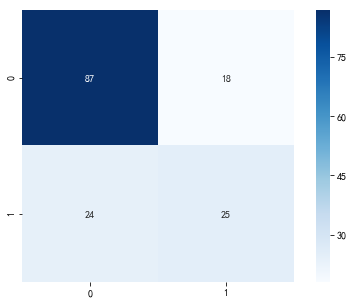

In [75]:
from seaborn import heatmap
heatmap(metrics.confusion_matrix(y_test, xgb_5.predict(X_test)), cmap=plt.cm.Blues, annot=True, square=True)